In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, preprocessing
from haversine import haversine

In [2]:
df=pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [5]:
df.shape

(729322, 11)

In [6]:
df['trip_duration'].mean()

952.2291333594764

In [7]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We can see there are no null values

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
numerical_cols=['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','vendor_id',
                'trip_duration']
df[numerical_cols].describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,1.535403,9.522291e+02
std,1.312446,0.069754,0.033594,0.069588,0.036037,0.498745,3.864626e+03
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000,1.000000e+00
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,1.000000,3.970000e+02
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,2.000000,6.630000e+02
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,2.000000,1.075000e+03
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,2.000000,1.939736e+06


In [10]:
df[numerical_cols].corr()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,trip_duration
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.286463,0.013022
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.008198,0.035447
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,0.002861,-0.038163
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.002371,0.020664
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,0.005259,-0.028283
vendor_id,0.286463,0.008198,0.002861,0.002371,0.005259,1.000000,0.027752
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,0.027752,1.000000


In [11]:
df[df['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
3572,id3364866,1,2016-02-13 14:04:20,2016-02-13 14:21:29,0,-73.990479,40.742004,-73.989243,40.763680,N,1029
23847,id3485118,1,2016-05-11 19:15:57,2016-05-11 19:32:18,0,-73.987572,40.754566,-73.972031,40.762836,N,981
45987,id2571672,1,2016-03-06 05:24:55,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5
76998,id1253169,1,2016-02-28 01:08:48,2016-02-28 01:09:01,0,-74.035942,40.736488,-74.035942,40.736492,N,13
101709,id1220914,2,2016-01-17 20:51:55,2016-01-17 20:52:43,0,-73.959999,40.766861,-73.960106,40.766911,N,48
186050,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
186913,id3494250,1,2016-04-02 02:32:10,2016-04-02 02:50:51,0,-74.005089,40.729038,-74.032486,40.619579,N,1121
194926,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,2191
231010,id0959777,2,2016-03-01 19:11:26,2016-03-01 19:11:30,0,-74.003777,40.738186,-74.003807,40.738174,N,4
247692,id2891366,1,2016-02-18 21:26:15,2016-02-18 21:28:00,0,-73.983543,40.716404,-73.983543,40.716404,N,105


We have some empty rides. which is useless

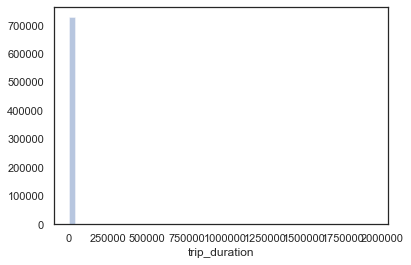

In [12]:
sns.distplot(df['trip_duration'], kde = False)
plt.show()

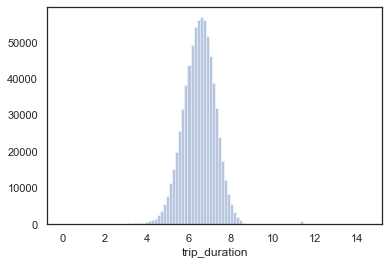

In [13]:
temp = np.log(df['trip_duration']) 

sns.distplot(temp, kde = False, bins = 100)
plt.show()

After log transformation, trip duration is a nice normal distribution

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [15]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda store_and_fwd_flag:1 if store_and_fwd_flag=='Y' else 0)

In [16]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [17]:
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek

In [18]:
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [19]:
df['dropoff_day'] = df['dropoff_datetime'].dt.dayofweek

In [20]:
df['pickup_month']=df['pickup_datetime'].dt.month

In [21]:
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [22]:
df['pickup_location'] = df[['pickup_latitude', 'pickup_longitude']].apply(tuple, axis=1)

In [23]:
df['dropoff_location'] = df[['dropoff_latitude', 'dropoff_longitude']].apply(tuple, axis=1)

In [24]:
df['distance_km'] = df.apply(lambda df: haversine(df['pickup_location'], df['dropoff_location']), axis=1)

Text(0, 0.5, 'Trip duration')

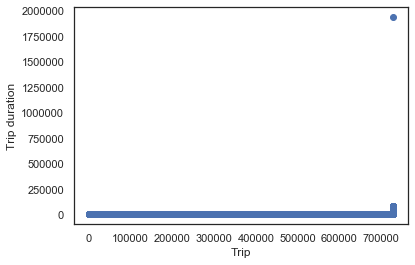

In [25]:
plt.scatter(df.index, df['trip_duration'].sort_values(ascending=True))
plt.xlabel('Trip')
plt.ylabel('Trip duration')

We can observe there are some outliers here

In [26]:
quantile_trip_duration = df['trip_duration'].quantile(0.99)
shortest_trip_higher_than_quantile = df['trip_duration'][df['trip_duration'] > quantile_trip_duration].min()
print("Shortest trip duration higher than the 99.999% quantile: ", shortest_trip_higher_than_quantile, "seconds")

Shortest trip duration higher than the 99.999% quantile:  3430 seconds


In [27]:
df = df[df['trip_duration'] < quantile_trip_duration]

Text(0, 0.5, 'Trip duration')

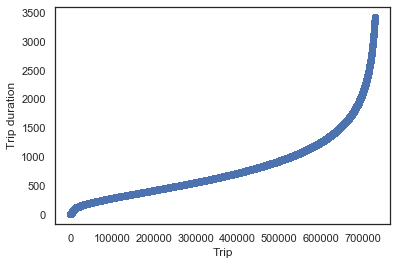

In [28]:
trip_durations_sorted = df['trip_duration'].copy().sort_values(ascending=True)
plt.scatter(df.index, trip_durations_sorted)
plt.xlabel('Trip')
plt.ylabel('Trip duration')

Text(0.5, 0, 'Trip duration')

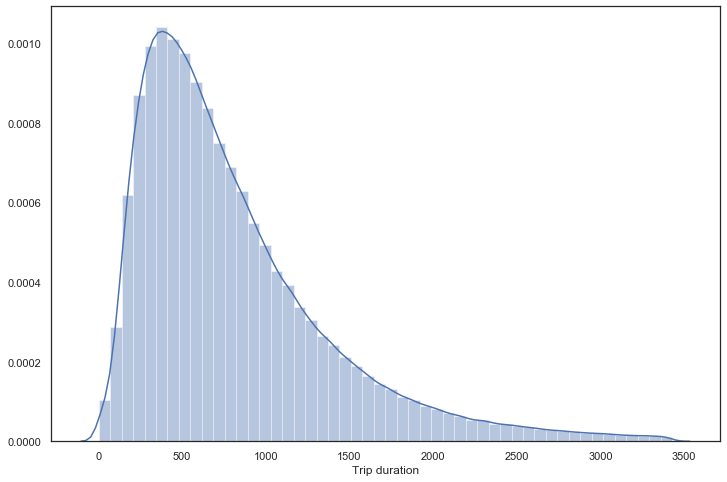

In [29]:
plt.figure(figsize=(12, 8))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip duration')

Text(0.5, 0, 'Logarithm of trip duration')

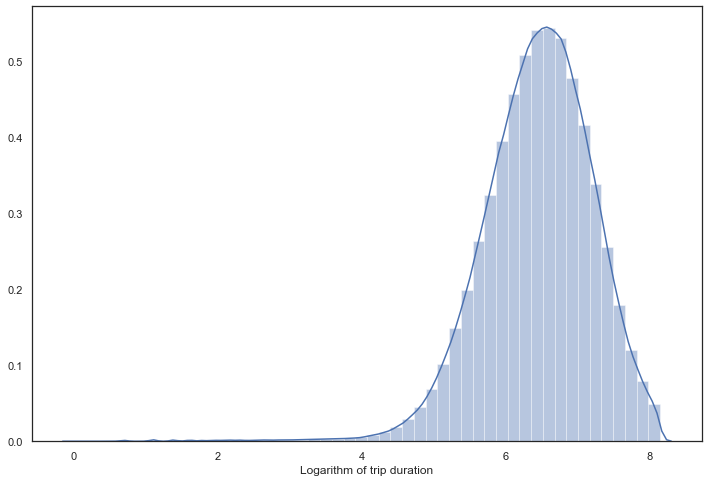

In [30]:
plt.figure(figsize=(12, 8))
sns.distplot(np.log(df['trip_duration'].values))
plt.xlabel('Logarithm of trip duration')

Text(0, 0.5, 'Trip count')

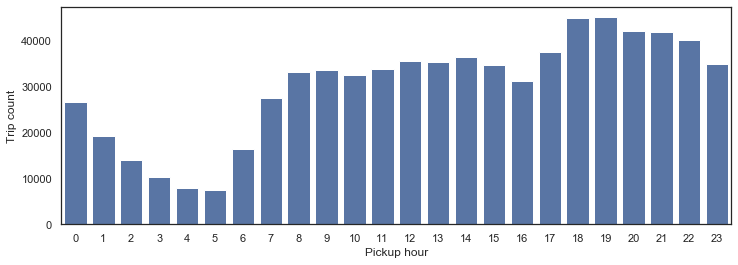

In [31]:
plt.figure(figsize=(12, 4))
sns.countplot('pickup_hour', data=df, color='#4C72B0')
plt.xlabel('Pickup hour')
plt.ylabel('Trip count')

We can observe the pick up count is more in the evenings

Text(0, 0.5, 'Trip count')

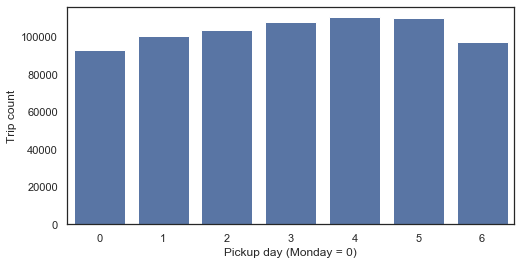

In [32]:
plt.figure(figsize=(8, 4))
sns.countplot('pickup_day', data=df, color='#4C72B0')
plt.xlabel('Pickup day (Monday = 0)')
plt.ylabel('Trip count')

Taxi usage is more on weekends

Text(0, 0.5, 'Trip count')

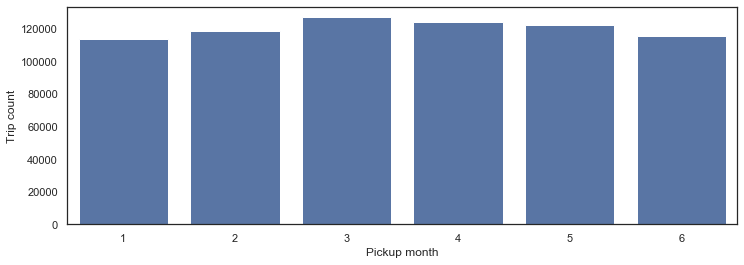

In [33]:
plt.figure(figsize=(12, 4))
sns.countplot('pickup_month', data=df, color='#4C72B0')
plt.xlabel('Pickup month')
plt.ylabel('Trip count')

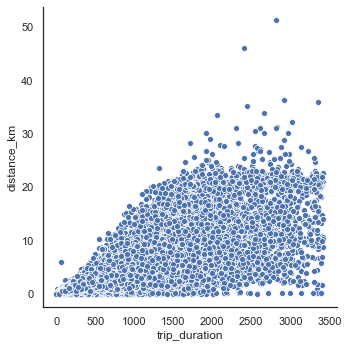

In [34]:
sns.relplot(x="trip_duration",y="distance_km",data=df[:60000],kind="scatter");

Trip duration is correlated with distance! 

In [35]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,dropoff_hour,dropoff_day,pickup_month,dropoff_month,pickup_location,dropoff_location,distance_km
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,16,0,16,0,2,2,"(40.77887344360352, -73.95391845703125)","(40.77116394042969, -73.96387481689453)",1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,23,4,23,4,3,3,"(40.73174285888672, -73.98831176757811)","(40.69493103027344, -73.9947509765625)",4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,17,6,18,6,2,2,"(40.721458435058594, -73.997314453125)","(40.774917602539055, -73.94802856445312)",7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,9,1,10,1,1,1,"(40.75971984863281, -73.961669921875)","(40.780628204345696, -73.95677947998048)",2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,6,2,6,2,2,2,"(40.70846939086913, -74.01712036132812)","(40.740631103515625, -73.9881820678711)",4.328540


In [40]:
numerical_cols1=['vendor_id','passenger_count','trip_duration','pickup_hour','pickup_day','pickup_month',
                'dropoff_hour','dropoff_day','dropoff_month','distance_km']
df[numerical_cols1].describe()

,vendor_id,passenger_count,trip_duration,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month,distance_km
count,722027.000000,722027.000000,722027.000000,722027.000000,722027.000000,722027.000000,722027.000000,722027.000000,722027.000000,722027.000000
mean,1.534584,1.660514,807.381516,13.610372,3.051934,3.514130,13.599394,3.055999,3.514421,3.315789
std,0.498803,1.311395,574.453713,6.417651,1.956047,1.680163,6.498650,1.958237,1.680301,4.102403
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,394.000000,9.000000,1.000000,2.000000,9.000000,1.000000,2.000000,1.226543
50%,2.000000,1.000000,657.000000,14.000000,3.000000,4.000000,14.000000,3.000000,4.000000,2.077376
75%,2.000000,2.000000,1058.000000,19.000000,5.000000,5.000000,19.000000,5.000000,5.000000,3.800012
max,2.000000,9.000000,3428.000000,23.000000,6.000000,6.000000,23.000000,6.000000,7.000000,1240.910391


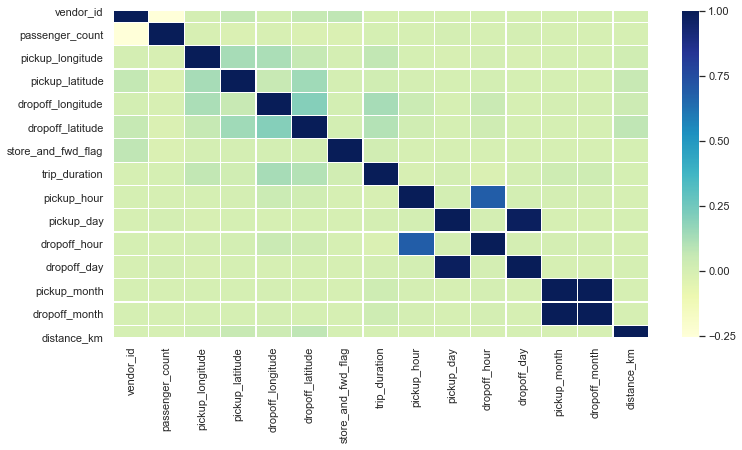

In [58]:
plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2 ,cmap="YlGnBu")

We can observe a high correlation between pick up and drop locations. Also between trip duration and drop location

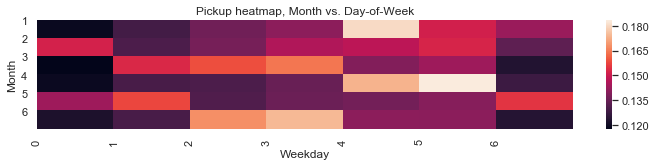

In [49]:
plt.figure(figsize=(12,2))
sns.heatmap(data=pd.crosstab(df.pickup_month, 
                             df.pickup_day, 
                             values=df.vendor_id, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Month vs. Day-of-Week')
plt.ylabel('Month'); plt.xlabel('Weekday')
plt.xticks(range(0,7),rotation='vertical')
plt.yticks(range(0,7),rotation='horizontal')
pass

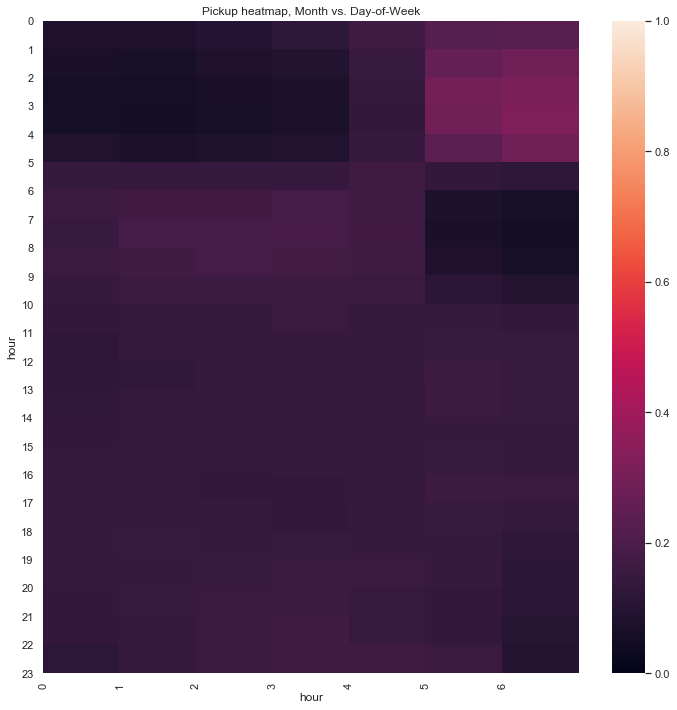

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(data=pd.crosstab(df.pickup_hour, 
                             df.pickup_day, 
                             values=df.vendor_id, 
                             aggfunc='count',
                             normalize='index'),vmin=0, vmax=1)

plt.title('Pickup heatmap, Month vs. Day-of-Week')
plt.ylabel('hour'); plt.xlabel('hour')
plt.xticks(range(0,7),rotation='vertical')
plt.yticks(range(0,24),rotation='horizontal')
pass

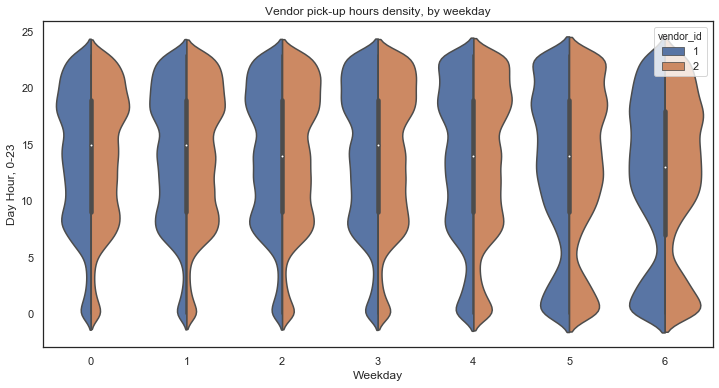

In [54]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df.pickup_day, 
               y=df.pickup_hour, 
               hue=df.vendor_id, 
               split=True)

plt.title('Vendor pick-up hours density, by weekday')
plt.xlabel('Weekday') ; plt.ylabel('Day Hour, 0-23')
plt.xticks(range(0,7), rotation='horizontal')
pass

It seems both the vendors make similar number of trips. 